<a href="https://colab.research.google.com/github/HarrisonSantiago/WebsiteNotebooks/blob/main/Statistics/Gibbs_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.integrate import nquad
import imageio
import io
import matplotlib.gridspec as gridspec
from matplotlib.table import Table
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.gridspec import GridSpec
from IPython.display import Image, display
from io import BytesIO

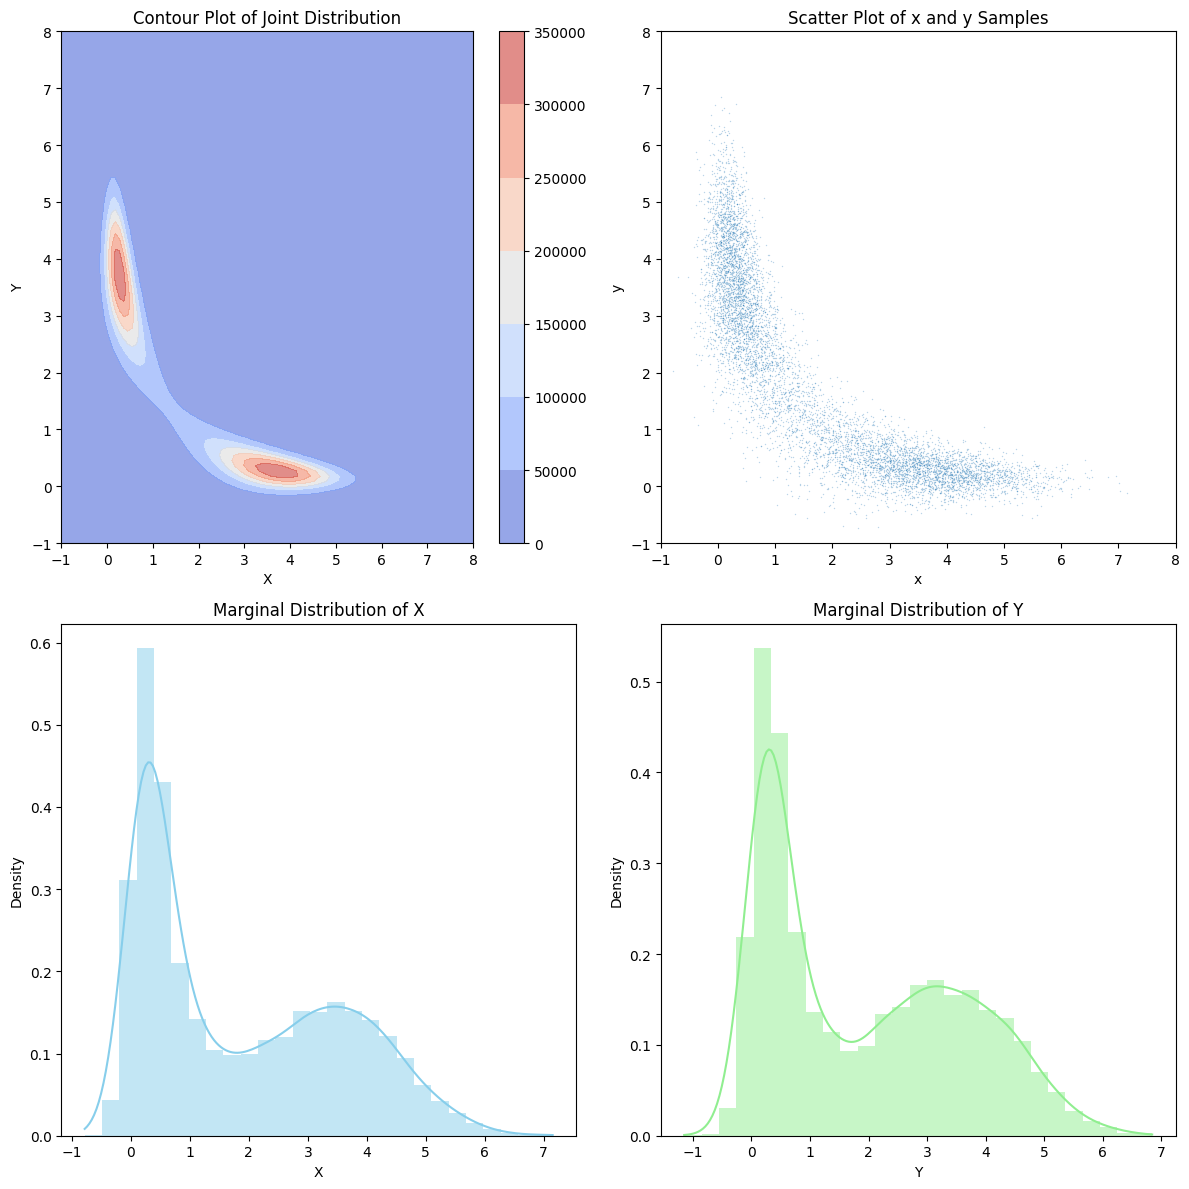

In [ ]:
# Define the conditional distribution functions
def sig(z):
    return np.sqrt(1.0 / (1.0 + z * z))

def mu(z):
    return 4.0 / (1.0 + z * z)

def sample_x_given_y(y):
    sigma_x = sig(y)
    mu_x = mu(y)
    return np.random.normal(mu_x, sigma_x)

def sample_y_given_x(x):
    sigma_y = sig(x)
    mu_y = mu(x)
    return np.random.normal(mu_y, sigma_y)

# Gibbs sampling parameters
num_samples = 10000
burn_in = 2000  # Burn-in period

# Initialize
samples = np.zeros((num_samples, 2))
x = 1.0
y = 6.0

# Gibbs sampling
for i in range(num_samples):
    x = sample_x_given_y(y)
    y = sample_y_given_x(x)
    samples[i, 0] = x
    samples[i, 1] = y

# Discard burn-in samples
samples = samples[burn_in:]

# Plotting the results
plt.figure(figsize=(12, 12))

# Joint distribution contour plot
x_range = np.linspace(-1, 8, 100)
y_range = np.linspace(-1, 8, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.exp(-1.5 * (X**2 * Y**2 + X**2 + Y**2 - 8 * X - 8 * Y) / 2.0)

plt.subplot(2, 2, 1)
plt.contourf(X, Y, Z, cmap='coolwarm', alpha=0.6)
plt.colorbar()
plt.xlim([-1, 8])
plt.ylim([-1, 8])
plt.title("Contour Plot of Joint Distribution")
plt.xlabel("X")
plt.ylabel("Y")

# Scatter plot of samples
plt.subplot(2, 2, 2)
sns.scatterplot(x=samples[:, 0], y=samples[:, 1], alpha=0.3, s=1)
plt.xlim([-1, 8])
plt.ylim([-1, 8])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x and y Samples')


# Marginal distributions
plt.subplot(2, 2, 3)
sns.histplot(samples[:, 0], kde=True, color='skyblue', edgecolor=None, stat='density')
plt.title("Marginal Distribution of X")
plt.xlabel("X")

plt.subplot(2, 2, 4)
sns.histplot(samples[:, 1], kde=True, color='lightgreen', edgecolor=None, stat='density')
plt.title("Marginal Distribution of Y")
plt.xlabel("Y")

plt.tight_layout()
plt.savefig('Gibbs_example1.png')

plt.show()


In [ ]:

# Define the conditional distribution functions
def sig(z):
    return np.sqrt(1.0 / (1.0 + z * z))

def mu(z):
    return 4.0 / (1.0 + z * z)

def sample_x_given_y(y):
    sigma_x = sig(y)
    mu_x = mu(y)
    return np.random.normal(mu_x, sigma_x)

def sample_y_given_x(x):
    sigma_y = sig(x)
    mu_y = mu(x)
    return np.random.normal(mu_y, sigma_y)

# Function to create a GIF
def create_conditional_gif(sample_func, fixed_range, filename, fixed_var_name='Y', variable_name='X'):
    num_cond_samples = 250
    images = []

    # Joint distribution setup (same for all frames)
    x_range = np.linspace(-1, 8, 100)
    y_range = np.linspace(-1, 8, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.exp(-(X**2 * Y**2 + X**2 + Y**2 - 8 * X - 8 * Y) / 2.0)

    for fixed_value in fixed_range:
        # Generate conditional samples
        cond_samples = np.array([sample_func(fixed_value) for _ in range(num_cond_samples)])

        # Create a figure with two subplots
        plt.figure(figsize=(12, 6))

        # Plot joint distribution with a red line
        plt.subplot(1, 2, 1)
        plt.contourf(X, Y, Z, cmap='coolwarm', alpha=0.6)
        if fixed_var_name == 'Y':
            plt.axhline(fixed_value, color='red', linestyle='--')
        else:
            plt.axvline(fixed_value, color='red', linestyle='--')
        plt.title("Joint Distribution")
        plt.xlim([-0.5, 8])
        plt.ylim([-0.5, 8])
        plt.xlabel("X")
        plt.ylabel("Y")

        # Plot conditional distribution
        plt.subplot(1, 2, 2)
        sns.histplot(cond_samples, kde=True, color='blue', edgecolor=None, stat='density')
        plt.axvline(fixed_value, color='red', linestyle='--', label=f'Fixed {fixed_var_name}')
        plt.title(f"Conditional Dist. of {variable_name} given {fixed_var_name}")
        plt.xlabel(variable_name)
        plt.xlim([-0.5, 8.5])
        plt.ylim([0, 1.5])
        plt.legend()
        plt.tight_layout()

        # Save to buffer
        plt.savefig('temp.png')
        plt.close()
        images.append(imageio.v2.imread('temp.png'))

    # Create GIF
    imageio.mimsave(filename, images, fps=30, loop = 0)

# Ranges for Y and X
y_range = np.linspace(0, 8, 200)
x_range = np.linspace(0, 8, 200)

# Create GIFs
create_conditional_gif(sample_x_given_y, y_range, 'conditional_x_given_y.gif', fixed_var_name='Y', variable_name='X')
create_conditional_gif(sample_y_given_x, x_range, 'conditional_y_given_x.gif', fixed_var_name='X', variable_name='Y')


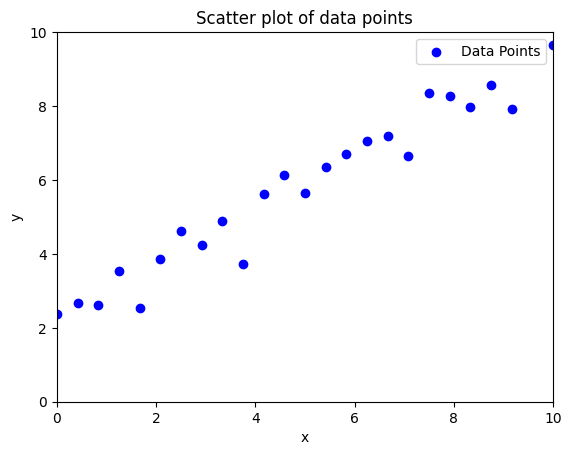

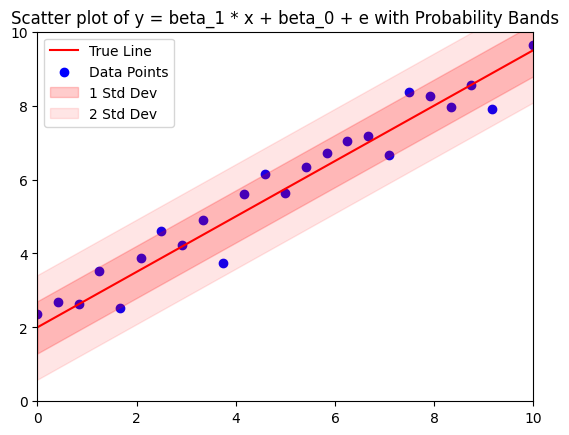

In [ ]:

# Define our vars
beta_0 = 2  # Intercept
beta_1 = 0.75  # Slope
tau = 2  # Precision (reciprocal of variance)

# Generate x values
x = np.linspace(0, 10, 25)

# Generate y values
epsilon = np.random.normal(0, 1 / np.sqrt(tau), x.shape)
y = beta_1 * x + beta_0 + epsilon

# Generate the true line
true_line = beta_1 * x + beta_0

# Calculate the standard deviation from tau
std_dev = 1 / np.sqrt(tau)

# Plot the points and the true line
plt.scatter(x, y, color='blue', label='Data Points')
plt.xlim(0, 10)
plt.ylim(0,10)

# Adding labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data points')
plt.legend()
plt.savefig('DataPoints.png')
plt.show()

plt.xlim(0, 10)
plt.ylim(0,10)

plt.plot(x, true_line, color='red', label='True Line')
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the probability bands
plt.fill_between(x, true_line - std_dev, true_line + std_dev, color='red', alpha=0.2, label='1 Std Dev')
plt.fill_between(x, true_line - 2*std_dev, true_line + 2*std_dev, color='red', alpha=0.1, label='2 Std Dev')

# Adding labels and title
plt.title('Scatter plot of y = beta_1 * x + beta_0 + e with Probability Bands')
plt.legend()
plt.savefig('Regression.png')
plt.show()


In [ ]:

# Define our vars
beta_0 = 2  # Intercept
beta_1 = 0.75  # Slope

# Generate x values
x = np.linspace(0, 10, 25)

# Function to generate y values and plot
def create_frame(tau):
    epsilon = np.random.normal(0, 1 / np.sqrt(tau), x.shape)
    y = beta_1 * x + beta_0 + epsilon
    true_line = beta_1 * x + beta_0
    std_dev = 1 / np.sqrt(tau)

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, true_line, color='red', label='True Line')
    plt.fill_between(x, true_line - std_dev, true_line + std_dev, color='red', alpha=0.2, label='1 Std Dev')
    plt.fill_between(x, true_line - 2*std_dev, true_line + 2*std_dev, color='red', alpha=0.1, label='2 Std Dev')
    plt.xlabel('x')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.ylabel('y')
    plt.title(f'tau = {tau:.2f}')
    plt.legend()
    plt.savefig('temp.png')
    plt.close()
    return plt.gcf()

# Create a list to store frames
frames = []

# Generate frames for different tau values
tau_values = np.linspace(0.05, 3, 120)
for tau in tau_values:
    frame = create_frame(tau)
    frames.append(imageio.v2.imread('temp.png'))

# Save frames as a GIF
imageio.mimsave('./tau_variation.gif', frames, fps=4, loop = 0)

<Figure size 640x480 with 0 Axes>

In [ ]:
def sample_beta_0(y, x, beta_1, tau, mu_0, tau_0):
    N = len(y)
    precision = tau_0 + tau * N
    mean = tau_0 * mu_0 + tau * np.sum(y - beta_1 * x)
    mean /= precision
    return np.random.normal(mean, 1 / np.sqrt(precision))


def sample_beta_1(y, x, beta_0, tau, mu_1, tau_1):
    N = len(y)
    precision = tau_1 + tau * np.sum(x * x)
    mean = tau_1 * mu_1 + tau * np.sum( (y - beta_0) * x)
    mean /= precision
    return np.random.normal(mean, 1 / np.sqrt(precision))

# Numpy uses the kappa/theta parameterization of
# the gamma distribution rather than alpha/beta,

def sample_tau(y, x, beta_0, beta_1, alpha, beta):
    N = len(y)
    alpha_new = alpha + N / 2
    resid = y - beta_0 - beta_1 * x
    beta_new = beta + np.sum(resid * resid) / 2
    return np.random.gamma(alpha_new, 1 / beta_new)


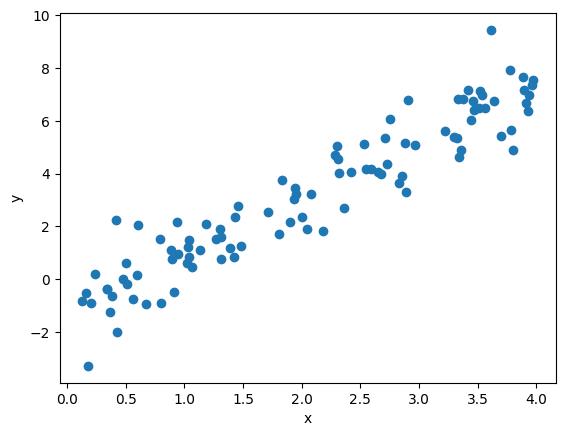

In [ ]:
beta_0_true = -1
beta_1_true = 2
tau_true = 1

N = 100
x = np.random.uniform(low = 0, high = 4, size = N)
y = np.random.normal(beta_0_true + beta_1_true * x, 1 / np.sqrt(tau_true))

synth_plot = plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('synthetic_data.png')

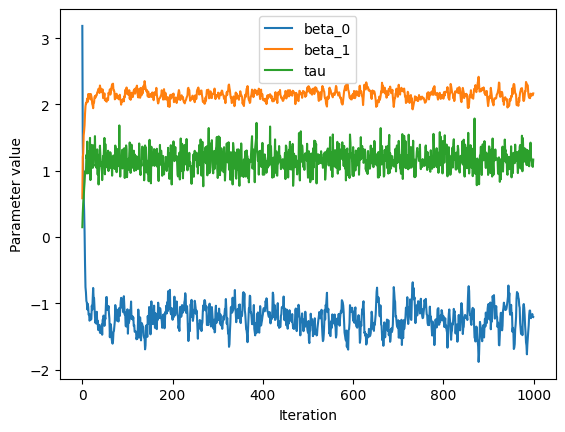

In [ ]:
import pandas as pd
## specify initial values
init = {"beta_0": 0,
        "beta_1": 0,
        "tau": 2}

## specify hyper parameters
hypers = {"mu_0": -1,
         "tau_0": 1,
         "mu_1": 1,
         "tau_1": 1,
         "alpha": 2,
         "beta": 1}


def gibbs(y, x, iters, init, hypers):
    assert len(y) == len(x)
    beta_0 = init["beta_0"]
    beta_1 = init["beta_1"]
    tau = init["tau"]

    trace = np.zeros((iters, 3)) ## trace to store values of beta_0, beta_1, tau

    for it in range(iters):
        beta_0 = sample_beta_0(y, x, beta_1, tau, hypers["mu_0"], hypers["tau_0"])
        beta_1 = sample_beta_1(y, x, beta_0, tau, hypers["mu_1"], hypers["tau_1"])
        tau = sample_tau(y, x, beta_0, beta_1, hypers["alpha"], hypers["beta"])
        trace[it,:] = np.array((beta_0, beta_1, tau))

    trace = pd.DataFrame(trace)
    trace.columns = ['beta_0', 'beta_1', 'tau']

    return trace


iters = 1000
trace = gibbs(y, x, iters, init, hypers)

traceplot = trace.plot()
traceplot.set_xlabel("Iteration")
traceplot.set_ylabel("Parameter value")
plt.savefig('trace.png')

       beta_0    beta_1       tau
500 -1.443887  2.194943  0.894799
501 -1.267907  2.274379  1.023340
502 -1.560516  2.269625  1.293056
503 -1.601545  2.239704  1.136734
504 -1.431642  2.240511  0.923448


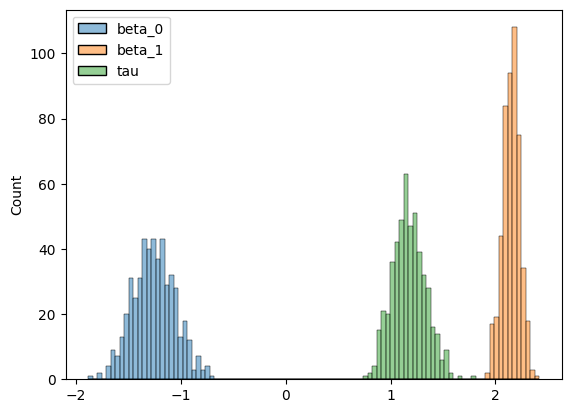

In [ ]:
trace_burnt = trace[500:999]
print(trace_burnt.head())

# hist_plot = trace_burnt.hist(bins = 30)
# # hist_plot
sns.histplot(trace_burnt, bins=100)
plt.savefig('gibbs_hist.png')

In [ ]:
print(f'true beta_0: {beta_0_true}')
print(f'true beta_1: {beta_1_true}')
print(f'true tau: {tau_true}')
print(f'estimated beta_0: {trace_burnt["beta_0"].mean()}')
print(f'estimated beta_1: {trace_burnt["beta_1"].mean()}')
print(f'estimated tau: {trace_burnt["tau"].mean()}')

true beta_0: -1
true beta_1: 2
true tau: 1
estimated beta_0: -1.2556264048219539
estimated beta_1: 2.1507320311649893
estimated tau: 1.1765377693464953
